In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ulda import ulda, ulda_feature_reduction

In [2]:
df = pd.read_csv('features.csv', index_col=0)
df

,class,subject,muscles,WL_imf1,WL_imf2,WL_imf3,WL_imf4,WL_imf5,WL_imf6,WL_imf7,...,MFD_imf4,MFD_imf5,MIF_imf1,MIF_imf2,MIF_imf3,MIF_imf4,MIF_imf6,PPSD_imf1,PPSD_imf4,PPSD_imf8
0,ALS,N2001A04DE02,Deltoideus,145447.331865,186749.748854,105354.708124,43665.544839,14127.024980,4267.759820,1303.532459,...,0.290702,-2.123516,-0.313056,-1.253226e-12,-1.369018e-12,2.071770e-12,1.176465e-13,6.263154,6.270810,6.280882
1,ALS,N2001A05DE59,Deltoideus,155885.933774,153213.684363,91820.416547,37747.151466,14182.165543,4815.355622,1451.367938,...,-12.351108,-8.778271,-251.972968,3.670183e-13,-7.652185e-13,1.022539e-12,3.454234e-12,6.269696,6.276535,6.281304
2,ALS,N2001A04DE01,Deltoideus,326488.631180,434418.959507,258161.481242,122546.842883,38123.460367,14207.140435,5205.946842,...,-7.673517,-32.837926,19.000061,5.077469e-12,-4.971717e-12,2.867722e-12,-1.641672e-11,6.256645,6.276423,6.280360
3,ALS,N2001A04DE05,Deltoideus,223491.996868,269272.082134,177297.101212,76607.983335,29335.501078,13797.592871,5924.177742,...,0.264161,-7.283035,-15.748309,-1.285428e-11,-4.756817e-12,1.084414e-12,-6.689509e-12,6.270742,6.273356,6.280339
4,ALS,N2001A04DE06,Deltoideus,122480.971724,196473.159700,135927.866489,56090.706809,20371.703981,6100.797887,2063.580457,...,17.707646,-14.872603,87.558429,-1.215822e-12,8.087575e-12,-1.320001e-11,-5.314775e-12,6.272320,6.269455,6.281383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,HealthyControls,N2001C03BB52,BicepsBrachii_long_head,465185.281058,500299.034683,288744.425747,141171.153070,40557.460542,13681.923754,4157.521958,...,-136.859277,62.090112,-60.872691,-1.438549e-12,-7.296254e-12,-2.244826e-11,1.089895e-11,6.278390,6.275128,6.280496
913,HealthyControls,N2001C03BB56,BicepsBrachii_long_head,358116.814307,290283.373328,190331.848891,74598.139790,25169.982317,7880.648289,2428.943701,...,-0.952479,-0.329674,-26.099452,-6.767917e-13,-2.094744e-12,-5.213644e-12,1.239141e-12,6.257858,6.271509,6.281861
914,HealthyControls,N2001C07BB71,BicepsBrachii_long_head,50370.464518,50330.171397,32930.234144,24233.008522,6968.049663,1778.821403,663.798908,...,0.214492,-1.236308,-0.332264,-5.447280e-13,3.666102e-13,9.987523e-14,3.978580e-13,6.244654,6.268253,6.280568
915,HealthyControls,N2001C10BB70,BicepsBrachii_long_head,184883.885006,211170.391648,119993.283632,45215.005313,16804.838981,4559.998531,1479.072318,...,-3.858900,-11.588663,20.412322,9.111891e-13,8.286542e-13,-3.142812e-12,6.633440e-13,6.265675,6.282819,6.282027


In [3]:
df_clean = df.dropna(how='any')

data_classes = pd.factorize(df_clean['class'])[0]
data_feat = np.array(df_clean[df_clean.columns[3:]])

In [17]:
red_feat = ulda_feature_reduction(data_feat, data_classes, 2)
nfeat = (red_feat - np.mean(red_feat, axis=0)) / np.std(red_feat, axis=0)

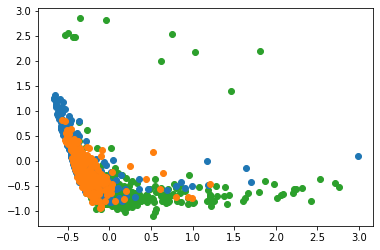

In [21]:
fig, ax = plt.subplots()

colors = ['tab:green', 'tab:blue', 'tab:orange']

for data, cl in zip(nfeat, data_classes):
    if data[0] >= 3 or data[1] >= 3: continue
    ax.scatter(data[0], data[1], c=colors[cl])

In [11]:
red_feat.shape

(906, 2)